In [1]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras.utils import to_categorical # utils.to_categorical
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow .keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Logistic Regression (binary classification)
## 1. Dataset 생성 & 전처리

In [2]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment = '#', header = None)
df.values[:2]
# 결측치 없으므로, csv파일을 바로 넘파이 배열로 읽어올 예정

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ]])

In [3]:
# np.set_printoptions(threshold = sys.maxsize)

In [4]:
# 1. 임신횟수
# 2. 2시간내 포도당 농도
# 3. 혈압
# 4. 피부접힘 두께
# 5. 인슐린수치
# 6. BMI체질량지수
# 7. 가족력
# 8. 나이
# 9. 당뇨병발병여부

In [5]:
# csv파일을 numpy 배열로 읽어오기 
# np.loadtxt(), np.genfromtxt() 
# 이 있는 행은 제외하고 읽어옴
# delimiter: 구분문자
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter = ',') 
dataset.shape

(768, 9)

In [6]:
# 학습데이터셋(학습용 데이터: train dataset): 모델 학습 시 사용
X_train = dataset[:700, :-1]
y_train = dataset[:700, -1]
# 테스트데이터셋(시험용 데이터: test dataset): 모델 평가 시 사용
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. Model 구성

In [7]:
model = Sequential()
model.add(Input(shape = (8, )))
model.add(Dense(units = 12, 
                activation = 'relu'))
model.add(Dense(units = 8, 
                activation = 'relu'))
model.add(Dense(units = 1,
                activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 3. Training Process 설정

In [8]:
# model.compile(loss = 'binary_crossentropy',
#               optimizer = 'adam',
#               metrics = ['accuracy'])
model.compile(loss      = 'binary_crossentropy',
              optimizer = 'adam',
              metrics   = ['binary_accuracy'])

## 4. Training

In [9]:
hist = model.fit(X_train, y_train, # train dataset
                 epochs = 200,
                 # batch_size = 350,
                 # validation_split = 0.2, # 검증 데이터 비율(훈련데이터셋 중 20%를 검증용 데이터로)
                 verbose = 1
                )

Epoch 1/200
22/22 [==============================] - 1s 6ms/step - loss: 3.7890 - binary_accuracy: 0.5429
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 1.9142 - binary_accuracy: 0.5114
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 1.3404 - binary_accuracy: 0.5157
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 1.1405 - binary_accuracy: 0.5229
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.9983 - binary_accuracy: 0.5643
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 0.9021 - binary_accuracy: 0.6057
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.8675 - binary_accuracy: 0.6014
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 0.7912 - binary_accuracy: 0.6043
Epoch 9/200
22/22 [==============================] - 0s 5ms/step - loss: 0.7670 - binary_accuracy: 0.6171
Epoch 10/200
22/22 [==========================

22/22 [==============================] - 0s 6ms/step - loss: 0.5353 - binary_accuracy: 0.7400
Epoch 154/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5165 - binary_accuracy: 0.7557
Epoch 155/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5202 - binary_accuracy: 0.7471
Epoch 156/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5106 - binary_accuracy: 0.7514
Epoch 157/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5206 - binary_accuracy: 0.7471
Epoch 158/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5212 - binary_accuracy: 0.7543
Epoch 159/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5176 - binary_accuracy: 0.7571
Epoch 160/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5138 - binary_accuracy: 0.7571
Epoch 161/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5247 - binary_accuracy: 0.7300
Epoch 162/200
22/22 [=====================

## 5. Model 평가(학습과정 보기, 평가)

In [10]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

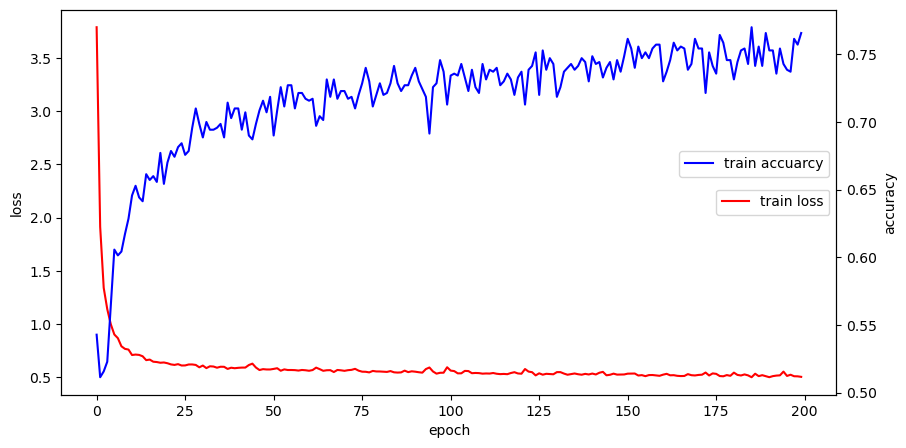

In [11]:
# 학습과정 표시하기(validation dataset 없는 경우)
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 'r', label = 'train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label = 'train accuarcy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.65))
plt.show()

In [20]:
# 모델 평가(X) 
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 5ms/step - loss: 0.4954 - binary_accuracy: 0.7614


[0.4953654706478119, 0.7614285945892334]

In [21]:
# 모델 평가(o)
score = model.evaluate(X_test, y_test)
print('loss: {}, accuracy:{}%'.format(score[0], score[1]*100))

3/3 [==============================] - 0s 8ms/step - loss: 0.6197 - binary_accuracy: 0.6765
loss: 0.6197272539138794, accuracy:67.64705777168274%


## 6. Model 사용하기

In [35]:
X_train[10], y_train[10]

(array([  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
         30.   ]),
 0.0)

In [36]:
model.predict([[4, 110, 92, 0, 0, 37.6, 0.191, 30]])

1/1 [==============================] - 0s 49ms/step


array([[0.21552609]], dtype=float32)

In [37]:
(model.predict([[4, 110, 92, 0, 0, 37.6, 0.191, 30],
               [6, 148, 72, 35, 0, 33.6, 0.6, 50]]) > 0.5).astype(int)

1/1 [==============================] - 0s 52ms/step


array([[0],
       [0]])

## 7. Cross-Tabulation 교차표
- test dataset 의 실제값(y_test)와 예측값

In [45]:
y_hat = (model.predict(X_test) > 0.5).astype(float)
cnt1 = 0; cnt2 = 0; cnt3 = 0; cnt4 = 0
# y_hat.shape, y_test.shape
for h, y in zip(y_hat.reshape(-1), y_test.reshape(-1)):
    if h == 1.0 and y == 1.0:
        cnt1 += 1
    elif y == 1.0 and h == 0.0:
        cnt2 += 1
    elif y == 0.0 and h == 1.0:
        cnt3 += 1
    else:
        cnt4 += 1
print(cnt1, cnt2)
print(cnt3, cnt4)

3/3 [==============================] - 0s 3ms/step
10 17
5 36


In [49]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
ctab.index.name = 'y'
ctab.columns.name = 'y_hat'
ctab

y_hat,0.0,1.0
y,,
0.0,36,5
1.0,17,10


# Multinomial Classification, 분류분석
```
1. Dataset (train 600 / validation 100 / test 68으로 분리), 종속변수의 One-Hot Encoding
2. Model 생성 (input 8, target 2): 출력층에서의 activation function은 'softmax'
3. Training Process 설정 (loss = 'categorical_crossentropy', metrics = ['accuracy'])
4. Training: validation_data = [X_val, Y_val] 추가
5. Model 평가: 그래프(hist.history.keys()를 확인 후 4가지)
               평가(X_test, Y_test)
               Cross-Tablulation 교차표(pd.crosstab 이용)
6. 모델 사용하기 - 예측
                  0       1
                  0.9912  0.00124
```

In [17]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras.utils import to_categorical # utils.to_categorical
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow .keras.layers import Dense, Input
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

### dataset

In [18]:
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter = ',')
dataset[:2]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ]])

In [19]:
# train dataset
X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
# validation dataset
X_val = dataset[600:700, :-1]
y_val = dataset[600:700, -1]
# test dataset
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((600, 8), (600, 2), (100, 8), (100, 2), (68, 8), (68, 2))

### one-hot encoding

In [20]:
# One-Hot Encoding
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)
Y_train[:2], Y_val[:2], Y_test[:2]

(array([[0., 1.],
        [1., 0.]], dtype=float32),
 array([[1., 0.],
        [1., 0.]], dtype=float32),
 array([[1., 0.],
        [0., 1.]], dtype=float32))

### model 생성

In [29]:
# Model 생성
model = Sequential()
model.add(Input(shape = (8)))
model.add(Dense(units = 12,
                activation = 'relu'))
model.add(Dense(units = 8,
                activation = 'relu'))
model.add(Dense(units = 2,
                activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                108       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 2)                 18        
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


### training process setting

In [30]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'nadam',
              metrics = ['accuracy'])

### training

In [31]:
hist = model.fit(X_train, Y_train, 
                 epochs = 300, 
                 verbose = 1, 
                 validation_data = [X_val, Y_val]
                )

Epoch 1/300
19/19 [==============================] - 1s 22ms/step - loss: 4.2844 - accuracy: 0.5150 - val_loss: 2.4865 - val_accuracy: 0.5800
Epoch 2/300
19/19 [==============================] - 0s 13ms/step - loss: 2.4652 - accuracy: 0.5467 - val_loss: 1.2916 - val_accuracy: 0.6100
Epoch 3/300
19/19 [==============================] - 0s 12ms/step - loss: 1.5426 - accuracy: 0.5050 - val_loss: 0.9496 - val_accuracy: 0.6100
Epoch 4/300
19/19 [==============================] - 0s 11ms/step - loss: 1.1003 - accuracy: 0.4833 - val_loss: 0.8325 - val_accuracy: 0.5700
Epoch 5/300
19/19 [==============================] - 0s 12ms/step - loss: 0.9212 - accuracy: 0.5150 - val_loss: 0.7615 - val_accuracy: 0.6200
Epoch 6/300
19/19 [==============================] - 0s 12ms/step - loss: 0.8309 - accuracy: 0.5383 - val_loss: 0.7224 - val_accuracy: 0.6100
Epoch 7/300
19/19 [==============================] - 0s 11ms/step - loss: 0.7764 - accuracy: 0.5950 - val_loss: 0.6853 - val_accuracy: 0.6100
Epoch 

19/19 [==============================] - 0s 12ms/step - loss: 0.5591 - accuracy: 0.7133 - val_loss: 0.5686 - val_accuracy: 0.7300
Epoch 59/300
19/19 [==============================] - 0s 11ms/step - loss: 0.5581 - accuracy: 0.7167 - val_loss: 0.5667 - val_accuracy: 0.7200
Epoch 60/300
19/19 [==============================] - 0s 9ms/step - loss: 0.5548 - accuracy: 0.7233 - val_loss: 0.5706 - val_accuracy: 0.6800
Epoch 61/300
19/19 [==============================] - 0s 11ms/step - loss: 0.5558 - accuracy: 0.7267 - val_loss: 0.5694 - val_accuracy: 0.7100
Epoch 62/300
19/19 [==============================] - 0s 10ms/step - loss: 0.5521 - accuracy: 0.7183 - val_loss: 0.5684 - val_accuracy: 0.7000
Epoch 63/300
19/19 [==============================] - 0s 10ms/step - loss: 0.5511 - accuracy: 0.7250 - val_loss: 0.5706 - val_accuracy: 0.7000
Epoch 64/300
19/19 [==============================] - 0s 10ms/step - loss: 0.5487 - accuracy: 0.7217 - val_loss: 0.5663 - val_accuracy: 0.7000
Epoch 65/300


19/19 [==============================] - 0s 11ms/step - loss: 0.5148 - accuracy: 0.7383 - val_loss: 0.5535 - val_accuracy: 0.7600
Epoch 116/300
19/19 [==============================] - 0s 10ms/step - loss: 0.5150 - accuracy: 0.7550 - val_loss: 0.5448 - val_accuracy: 0.7600
Epoch 117/300
19/19 [==============================] - 0s 11ms/step - loss: 0.5137 - accuracy: 0.7267 - val_loss: 0.5453 - val_accuracy: 0.7500
Epoch 118/300
19/19 [==============================] - 0s 11ms/step - loss: 0.5127 - accuracy: 0.7450 - val_loss: 0.5428 - val_accuracy: 0.7800
Epoch 119/300
19/19 [==============================] - 0s 11ms/step - loss: 0.5130 - accuracy: 0.7350 - val_loss: 0.5467 - val_accuracy: 0.7600
Epoch 120/300
19/19 [==============================] - 0s 11ms/step - loss: 0.5095 - accuracy: 0.7533 - val_loss: 0.5390 - val_accuracy: 0.7300
Epoch 121/300
19/19 [==============================] - 0s 12ms/step - loss: 0.5125 - accuracy: 0.7350 - val_loss: 0.5570 - val_accuracy: 0.7500
Epoch 

Epoch 172/300
19/19 [==============================] - 0s 12ms/step - loss: 0.4947 - accuracy: 0.7500 - val_loss: 0.5397 - val_accuracy: 0.7700
Epoch 173/300
19/19 [==============================] - 0s 11ms/step - loss: 0.4985 - accuracy: 0.7500 - val_loss: 0.5407 - val_accuracy: 0.7300
Epoch 174/300
19/19 [==============================] - 0s 11ms/step - loss: 0.4953 - accuracy: 0.7500 - val_loss: 0.5312 - val_accuracy: 0.8000
Epoch 175/300
19/19 [==============================] - 0s 11ms/step - loss: 0.4929 - accuracy: 0.7450 - val_loss: 0.5338 - val_accuracy: 0.7900
Epoch 176/300
19/19 [==============================] - 0s 11ms/step - loss: 0.4941 - accuracy: 0.7450 - val_loss: 0.5389 - val_accuracy: 0.7600
Epoch 177/300
19/19 [==============================] - 0s 11ms/step - loss: 0.4938 - accuracy: 0.7500 - val_loss: 0.5414 - val_accuracy: 0.7800
Epoch 178/300
19/19 [==============================] - 0s 12ms/step - loss: 0.4928 - accuracy: 0.7517 - val_loss: 0.5504 - val_accuracy:

Epoch 229/300
19/19 [==============================] - 0s 13ms/step - loss: 0.4790 - accuracy: 0.7583 - val_loss: 0.5372 - val_accuracy: 0.7800
Epoch 230/300
19/19 [==============================] - 0s 13ms/step - loss: 0.4756 - accuracy: 0.7700 - val_loss: 0.5387 - val_accuracy: 0.7800
Epoch 231/300
19/19 [==============================] - 0s 13ms/step - loss: 0.4781 - accuracy: 0.7517 - val_loss: 0.5401 - val_accuracy: 0.8000
Epoch 232/300
19/19 [==============================] - 0s 12ms/step - loss: 0.4786 - accuracy: 0.7650 - val_loss: 0.5308 - val_accuracy: 0.7800
Epoch 233/300
19/19 [==============================] - 0s 12ms/step - loss: 0.4782 - accuracy: 0.7683 - val_loss: 0.5388 - val_accuracy: 0.7800
Epoch 234/300
19/19 [==============================] - 0s 13ms/step - loss: 0.4756 - accuracy: 0.7633 - val_loss: 0.5391 - val_accuracy: 0.7700
Epoch 235/300
19/19 [==============================] - 0s 11ms/step - loss: 0.4716 - accuracy: 0.7767 - val_loss: 0.5408 - val_accuracy:

Epoch 286/300
19/19 [==============================] - 0s 11ms/step - loss: 0.4641 - accuracy: 0.7767 - val_loss: 0.5204 - val_accuracy: 0.8000
Epoch 287/300
19/19 [==============================] - 0s 10ms/step - loss: 0.4616 - accuracy: 0.7883 - val_loss: 0.5237 - val_accuracy: 0.7700
Epoch 288/300
19/19 [==============================] - 0s 11ms/step - loss: 0.4630 - accuracy: 0.7717 - val_loss: 0.5216 - val_accuracy: 0.8000
Epoch 289/300
19/19 [==============================] - 0s 11ms/step - loss: 0.4605 - accuracy: 0.7783 - val_loss: 0.5249 - val_accuracy: 0.8000
Epoch 290/300
19/19 [==============================] - 0s 10ms/step - loss: 0.4683 - accuracy: 0.7800 - val_loss: 0.5162 - val_accuracy: 0.8000
Epoch 291/300
19/19 [==============================] - 0s 9ms/step - loss: 0.4603 - accuracy: 0.7833 - val_loss: 0.5331 - val_accuracy: 0.7800
Epoch 292/300
19/19 [==============================] - 0s 10ms/step - loss: 0.4619 - accuracy: 0.7750 - val_loss: 0.5338 - val_accuracy: 

### Model 평가

In [32]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

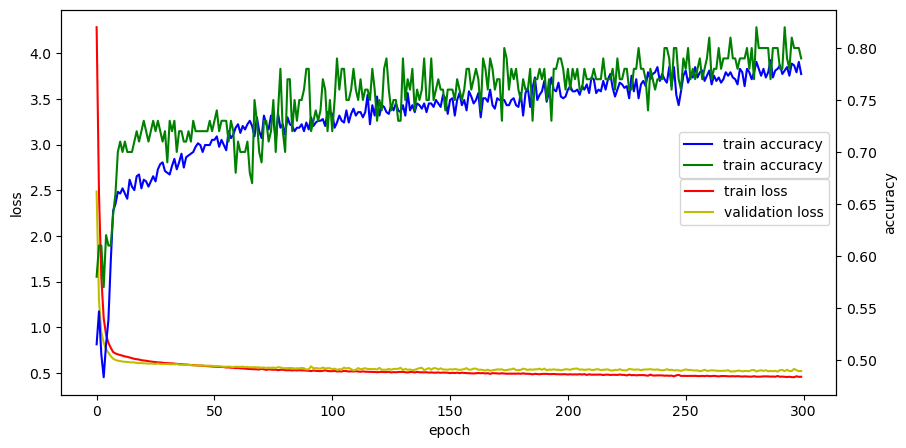

In [33]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [34]:
# test dataset으로 Model 평가하기
score = model.evaluate(X_test, Y_test)
print("Test Dataset loss: {}, accuracy: {}".format(score[0], score[1]))

3/3 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.8088
Test Dataset loss: 0.5840337872505188, accuracy: 0.8088235259056091


In [35]:
score # loss와 compile에서 metrics = ['accuracy']지정으로 accuracy가 저장

[0.5840337872505188, 0.8088235259056091]

In [57]:
# Cross-Tablulation, 교차표 (One-Hot Encoding을 통한 분류분석)
# pd.crosstab(실제값1차원, 예측값1차원)
all(Y_test.argmax(axis = 1) == y_test)
print(Y_test[:1], y_test[:1]) # argmax: 최댓값의 index를 반환

[[1. 0.]] [0.]


In [60]:
# 예측값
Y_hat = model.predict(X_test)
y_hat = Y_hat.argmax(axis = 1)
y_hat = np.argmax(Y_hat, axis = 1)
Y_hat[:2], y_hat[:2]

3/3 [==============================] - 0s 1ms/step


(array([[0.59773445, 0.40226555],
        [0.62008256, 0.3799174 ]], dtype=float32),
 array([0, 0], dtype=int64))

In [61]:
ctab = pd.crosstab(y_test, y_hat)
ctab.index.name = '실제'
ctab.columns.name = '예측'
ctab

예측,0,1
실제,,
0.0,38,3
1.0,10,17


### Model 사용

In [63]:
X_test[0], y_test[0]

(array([  2.   , 122.   ,  76.   ,  27.   , 200.   ,  35.9  ,   0.483,
         26.   ]),
 0.0)

In [67]:
# predict에는 2차원 데이터
predict = model.predict(np.array([[2., 122., 76., 27., 200., 35.9, 0.483, 26.]]))
predict = model.predict([[2., 122., 76., 27., 200., 35.9, 0.483, 26.],
                         [2., 122., 76., 27., 200., 35.9, 0.483, 26.]])
predict

1/1 [==============================] - 0s 46ms/step


array([[0.59773445, 0.40226555],
       [0.59773445, 0.40226555]], dtype=float32)

In [69]:
predict.argmax(axis = 1)
np.argmax(predict, axis = 1)

array([0, 0], dtype=int64)